In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  9 14:12:53 2017

@author: charles
"""

import pickle
import numpy as np
from scipy.stats import chi2

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

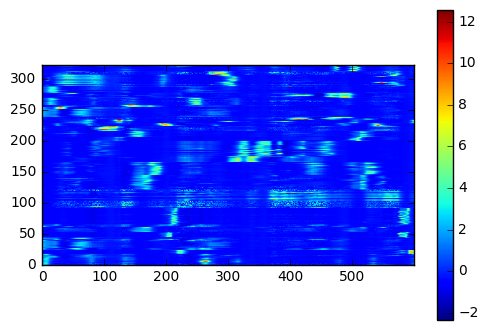

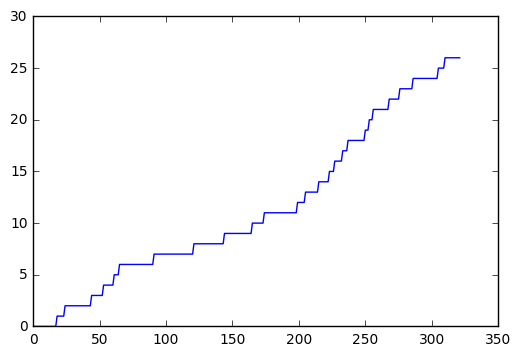

Il y a 322 données réparties sur 27 classes


In [2]:
#
# Data importation
#

X = np.load('./data/obs.npy')
X_sc = StandardScaler().fit(X) # standard scaling
X = X_sc.transform(X)
y = pickle.load( open( "./data/labels.pkl", "rb" ) )

plt.imshow(X,cmap='jet')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
plt.plot(y)

plt.show()
print("Il y a "+str(len(y))+" données réparties sur 27 classes")

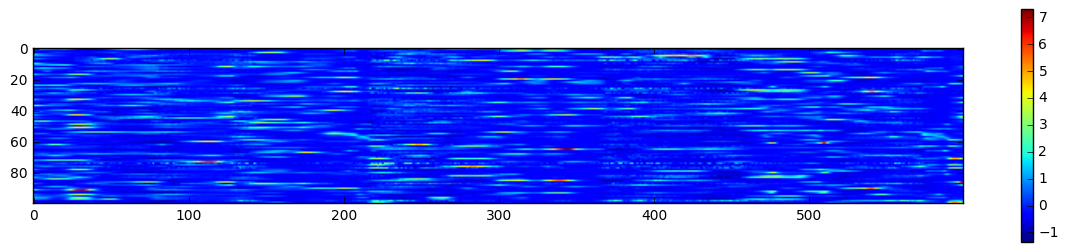

In [11]:
somme=np.zeros((100,600))
classe=[]
poids=[]
Ybis=np.zeros((100,3,2))
for ii in range(100):
    classes=np.random.randint(27,size=[3,])
    #print(classes)
    classe.append(classes)
    Ybis[ii,:,0]=classes
    
    elements=[]
    for i in range(len( classes)):
        e1=y.index(classes[i])
        if classes[i]+1 == 27:
            e2=321
        else:
            e2=y.index(classes[i]+1)
    
        elements.append(np.random.choice(np.arange(e1,e2)))
        
    tosomme=np.zeros((len(elements),600))
    rand=np.random.rand(3)
    rand=rand/np.sum(rand)
    poids.append(rand)
    Ybis[ii,:,1]=rand
    
    for i in range(len(elements)):
    
        tosomme[i,:]=X[elements[i],:]*rand[i]
    
    somme[ii,:]=np.sum(tosomme,axis=0)    
plt.figure(figsize=(15,3))
plt.imshow(somme,cmap='jet')
plt.colorbar()
plt.show()

In [12]:
from collections import Counter
count=Counter(y)
count

Counter({0: 18,
         1: 6,
         2: 20,
         3: 9,
         4: 8,
         5: 4,
         6: 26,
         7: 30,
         8: 23,
         9: 21,
         10: 9,
         11: 25,
         12: 6,
         13: 10,
         14: 8,
         15: 4,
         16: 6,
         17: 4,
         18: 13,
         19: 3,
         20: 3,
         21: 12,
         22: 8,
         23: 10,
         24: 19,
         25: 5,
         26: 12})

In [25]:
mean=[]
std=[]
for i in range(len(count)):
    e1=y.index(i)
    if i+1 == 27:
        e2=321
    else:
        e2=y.index(i+1)
    mean.append(np.mean(X[e1:e2],axis=0))
    std.append(np.std(X[e1:e2],axis=0))

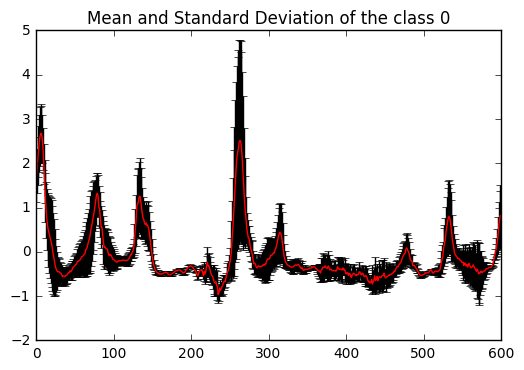

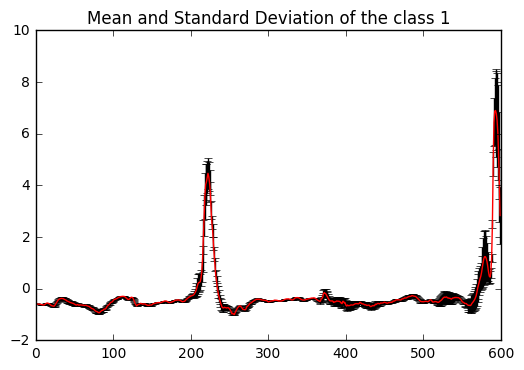

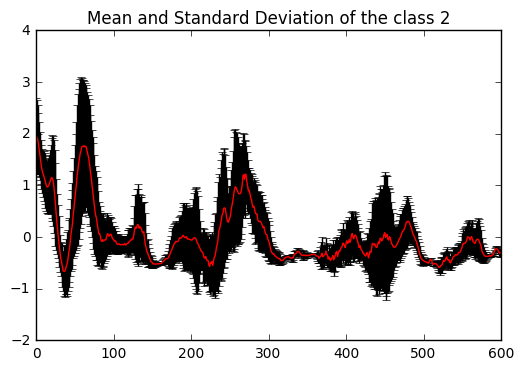

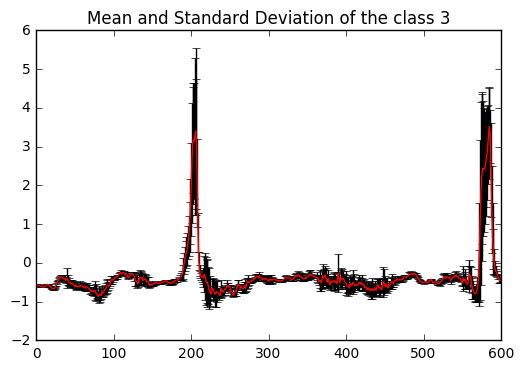

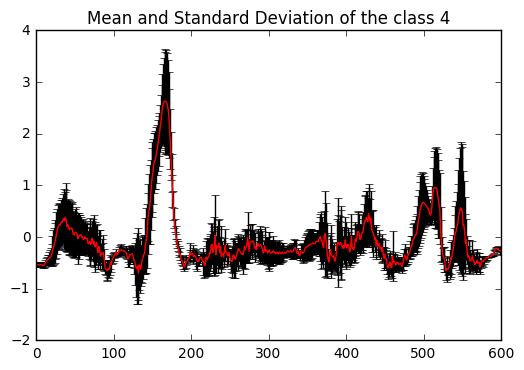

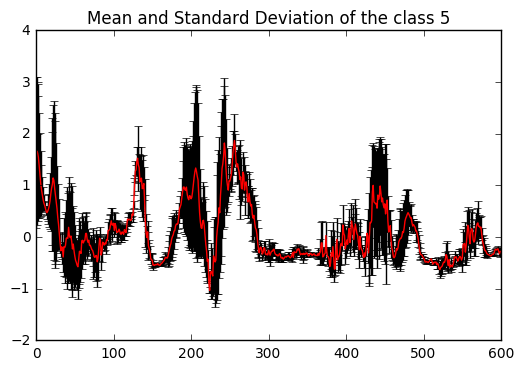

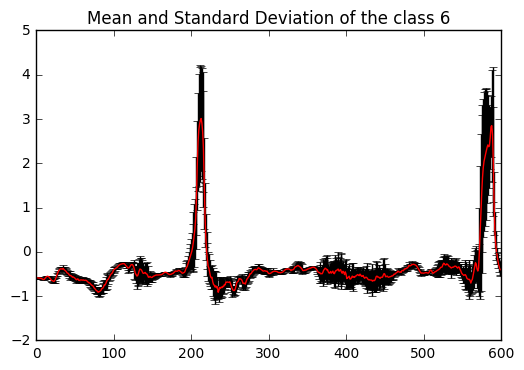

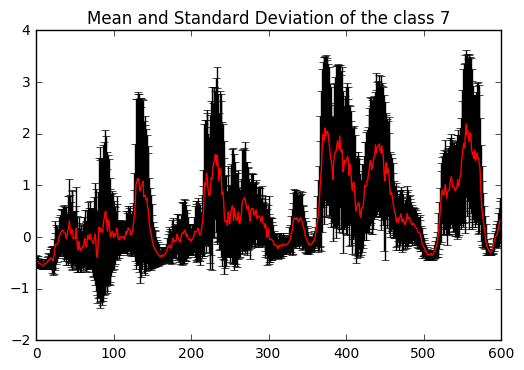

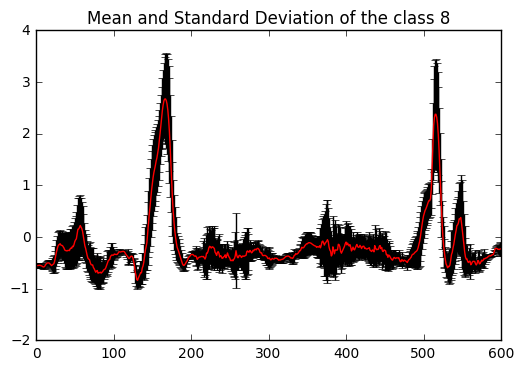

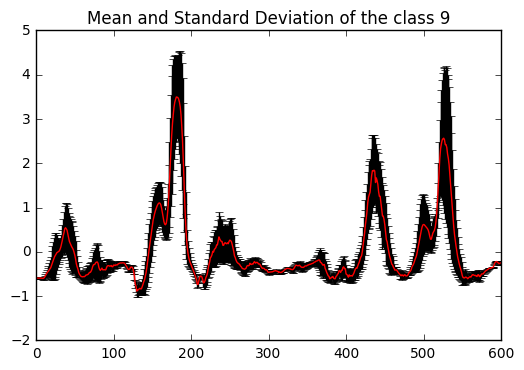

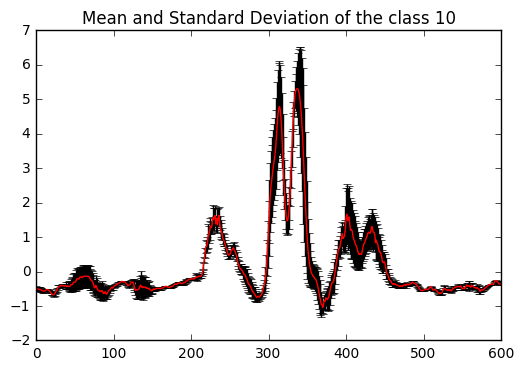

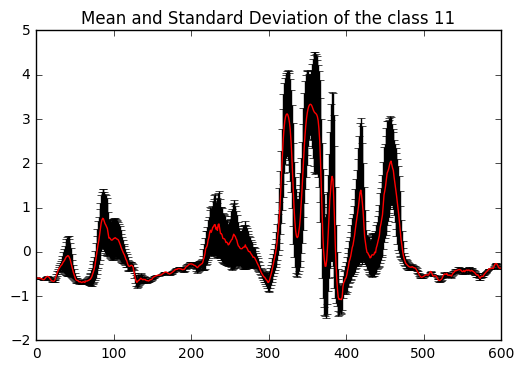

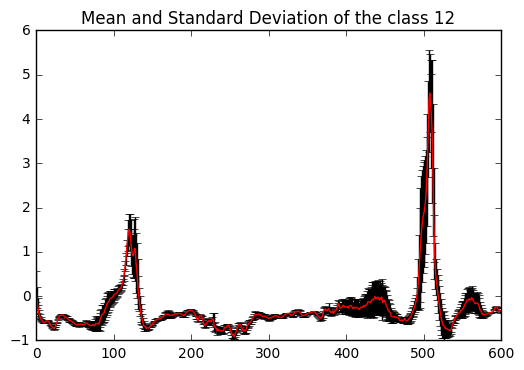

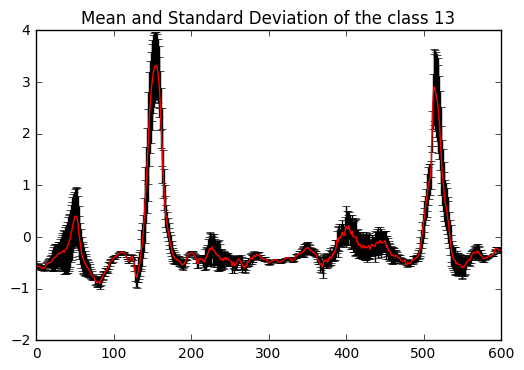

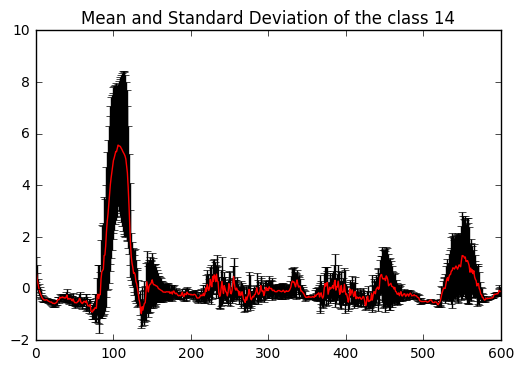

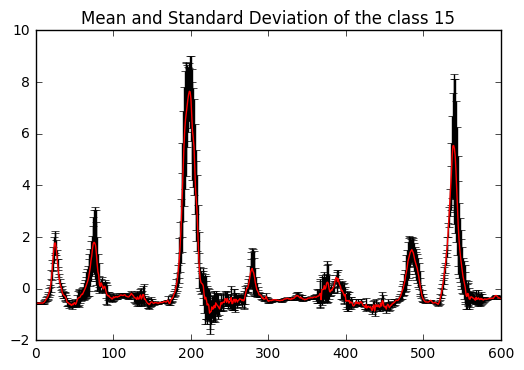

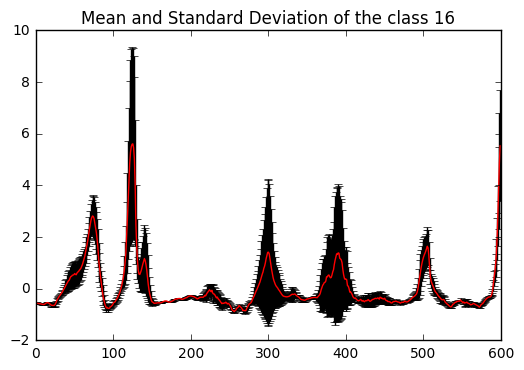

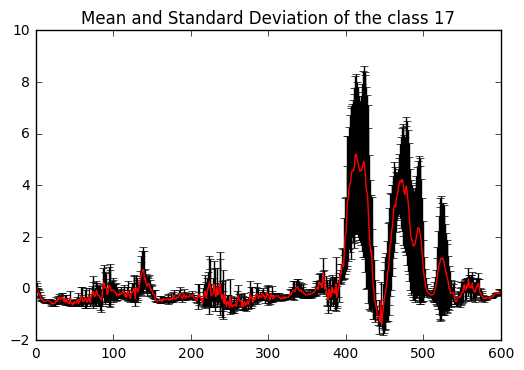

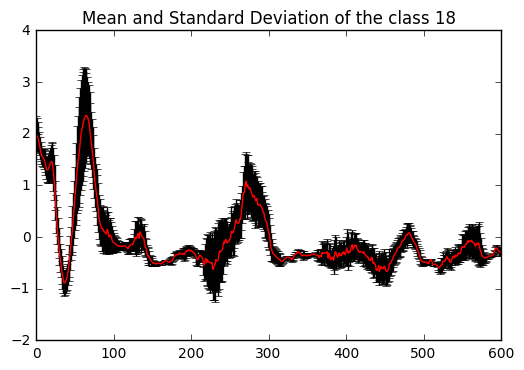

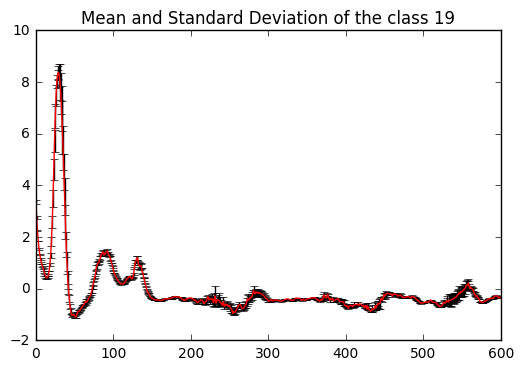

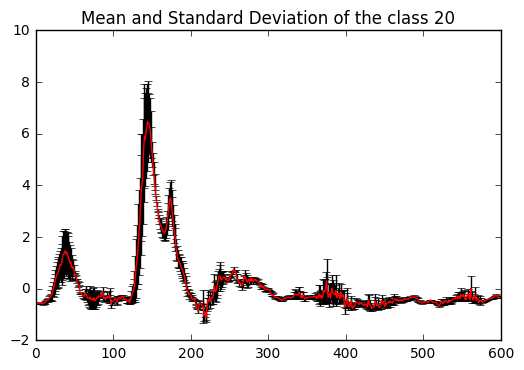

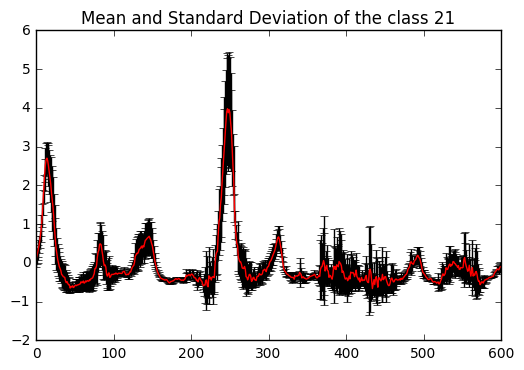

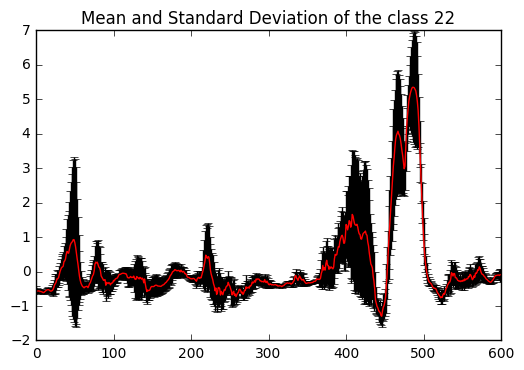

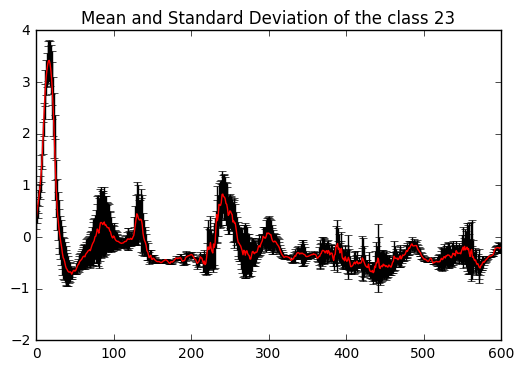

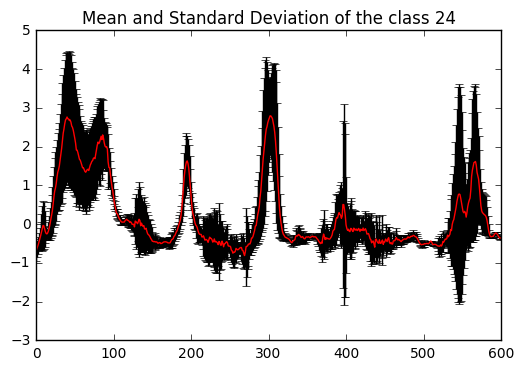

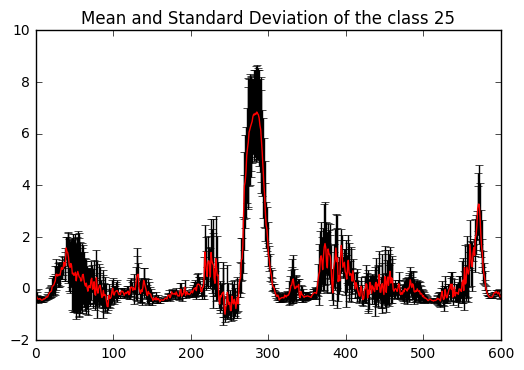

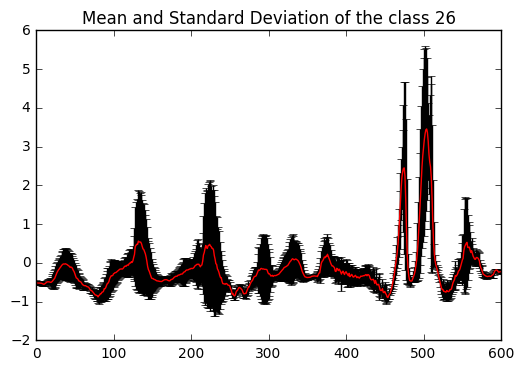

In [36]:

for i in range(len(count)):
    plt.figure(i)
    
    plt.errorbar(np.arange(600),mean[i],yerr=std[i],elinewidth=1,color='r',mfc="k",ecolor="k")
    plt.title('Mean and Standard Deviation of the class '+str(i))
    plt.show()



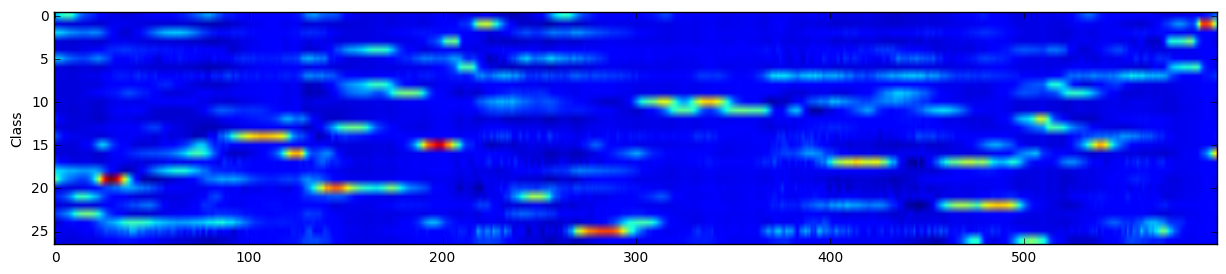

In [41]:
plt.figure(figsize=(15,3))
plt.imshow(mean,aspect='auto')
plt.ylabel('Class')
plt.show()